---

# How to use your own `matplotlib` `Figure` and `Axes` in `mplfinance`

---

### &bull; Using your own `matplotlib` `Figure` and `Axes` makes your code more complex,<br>&nbsp;&nbsp; compared to direct use of `mplfinance`,<br>&nbsp;&nbsp; but it provides all the power and flexibility of `matplotlib`<br>&nbsp;&nbsp; for those who know how and want to use it.
- When you pass a `matplotbib` `Axes` into `mplfinance`,<br>&nbsp;&nbsp; we say that `mplfinance` is in **External Axes Mode.**  
- Certain `mplfinance` features may be not available,<br>&nbsp;&nbsp; or may behave differently, when in External Axes Mode (see below for details).

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.colors = 'LightBG'

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


#### Let's grab 5 months of data from the input data frame:

In [4]:
df = idf.loc['2011-07-01':'2011-12-30',:]

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.6a5'

external_axes_mode = False
config['ylim']= None
config['xlim']= None
config['tight_layout']= True


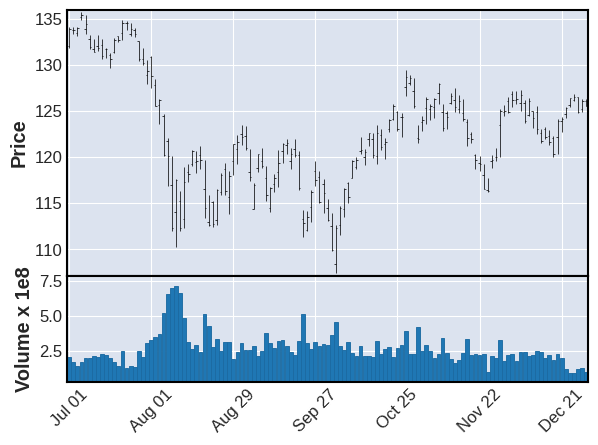

In [5]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True,tight_layout=True,figscale=0.75)

---

Basic Introduction to External Axes Mode:
---

**`mplfinance`** provides a wrapper function to create a **`Figure`:**
 
- [**`mpf.figure()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure)
  
This function behaves exactly like its matplotlib `pyplot` equivalent, with the added feature that it accepts **`style=`** kwarg, and embeds `mplfinance` style information into the Figure that it creates.

Once you have created a Figure, you can call standard matplotlib Figure methods for creating subplot Axes:

- [**`fig.add_subplot()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)
- [**`fig.add_axes()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes)
- [**`fig.subplots()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.subplots)

Regarding the above three Figure methods, if the Figure was created using `mplfinance`, then these methods will apply style information to the Subplot Axes they create, based on the mplfinance style information found inside the Figure. ***Alternatively*** the user may pass **`style=`** into these Figure methods to apply a style to the Subplot Axes that may be different from the style that was applied to the Figure.


If you are more familiar with calling `plt.subplot()` or `plt.subplots()`, the **please note that:**
- `plt.subplot()` is exactly the same as calling **`fig.add_subplot()`** on the "current" Figure, and
- `plt.subplots()` is the same as calling **`fig.subplots()`** on the "current" Figure.


---

Here is an example of creating a Figure and Axes with a certain style:


In [6]:
%%capture
fig = mpf.figure(style='yahoo',tight_layout=False,figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

external_axes_mode = True
config['ylim']= None
config['xlim']= None
config['tight_layout']= False
True all None


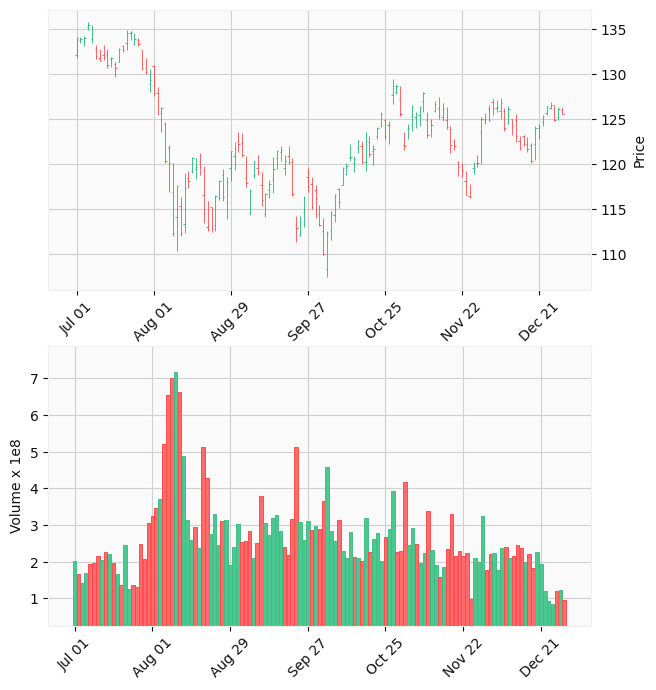

In [7]:
#mpf.plot(df,ax=ax1,volume=ax2,tight_layout=True)
mpf.plot(df,ax=ax1,volume=ax2)
fig

In [8]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-8-a6774c8535dd>, line 1)

In [ ]:
#mpf.plot(df,scale_padding=1.0,ax=ax,fig=fig,figscale=0.75)
mpf.plot(df,scale_padding=1.0,ax=ax,figscale=0.75)

In [ ]:
fig

In [ ]:
mpf.available_styles()

In [ ]:
%%capture
#s = mpf._styles._get_mpfstyle('nightclouds')
#mpf._styles._apply_mpfstyle(s)

#fig, axes = plt.subplots(2,2)
fig = plt.figure(figsize=(12,9))

In [ ]:
s = mpf._styles._get_mpfstyle('blueskies')
#s
mpf._styles._apply_mpfstyle(s)
ax1 = fig.add_subplot(2,2,1)

s = mpf._styles._get_mpfstyle('yahoo')
mpf._styles._apply_mpfstyle(s)
ax2 = fig.add_subplot(2,2,2)

s = mpf.make_mpf_style(base_mpl_style='fast',base_mpf_style='nightclouds')
#s = mpf._styles._get_mpfstyle('nightclouds')
mpf._styles._apply_mpfstyle(s)
ax3 = fig.add_subplot(2,2,3)

s = mpf._styles._get_mpfstyle('starsandstripes')
mpf._styles._apply_mpfstyle(s)
ax4 = fig.add_subplot(2,2,4)

In [ ]:
# mpf.plot(df,ax=ax1,fig=fig,style='blueskies')
# mpf.plot(df,type='candle',ax=ax2,figscale=1.5,fig=fig,style='yahoo')
# mpf.plot(df,ax=ax3,fig=fig,style='blueskies',type='candle')
# mpf.plot(df,type='candle',ax=ax4,figscale=1.5,fig=fig,style='sas')

mpf.plot(df,ax=ax1,style='blueskies')
mpf.plot(df,type='candle',ax=ax2,figscale=1.5,style='yahoo')
mpf.plot(df,ax=ax3,style='blueskies',type='candle')
mpf.plot(df,type='candle',ax=ax4,figscale=1.5,style='sas')

In [ ]:
fig

In [ ]:
prefix = '../../examples/data/'
aapl = pd.read_csv(prefix+'yahoofinance-AAPL-20040819-20180120.csv',index_col='Date',parse_dates=True)
goog = pd.read_csv(prefix+'yahoofinance-GOOG-20040819-20180120.csv',index_col='Date',parse_dates=True)
spy  = pd.read_csv(prefix+'yahoofinance-SPY-20080101-20180101.csv',index_col='Date',parse_dates=True)
aapl = aapl.loc['2016-05-01':'2016-07-31']
goog = goog.loc['2016-05-01':'2016-07-31']
spy = spy.loc['2016-05-01':'2016-07-31']
aapl.tail(2)
goog.tail(2)
spy.tail(2)

In [ ]:
mpf.available_styles()

In [ ]:
sname = 'yahoo'
s = mpf._styles._get_mpfstyle(sname)
mpf._styles._apply_mpfstyle(s)
fig = plt.figure(figsize=(9,6))

In [ ]:
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

av1 = fig.add_subplot(3,3,7,sharex=ax1)
av2 = fig.add_subplot(3,3,8,sharex=ax1)
av3 = fig.add_subplot(3,3,9,sharex=ax3)

In [ ]:
mpf.plot(aapl,type='candle',ax=ax1,figratio=(10,5),style=s,volume=av1,mav=(10,20),axtitle='AAPL')
mpf.plot(goog,type='candle',ax=ax2,figratio=(10,5),style=s,volume=av2,mav=(10,20),axtitle='GOOG')
mpf.plot(spy ,type='candle',ax=ax3,figratio=(10,5),style=s,volume=av3,mav=(10,20),axtitle='SPY',closefig=True)

In [ ]:
%%capture
#ax1.set_title('AAPL')
#ax2.set_title('GOOG')
#ax3.set_title('SPY')
#fig.suptitle('This is the Figure Title for the Entire Figure')

In [ ]:
fig

In [ ]:
plt.close(None)

In [ ]:
ap = mpf.make_addplot(spy,type='ohlc')
mpf.plot(aapl,type='candle',style='yahoo',addplot=ap)

In [ ]:
%%capture
plt.style.use('seaborn')
fig, ax = plt.subplots()
plt.rcParams.update({'axes.grid':False})
ax2 = ax.twinx()
mpf.plot(spy,ax=ax,type='ohlc',style='default')
mpf.plot(aapl,ax=ax2,type='candle',style='yahoo')

In [ ]:
fig

In [ ]:
fig = mpf.figure(style='blueskies',figsize=(12,10))#,figsize=(10,10))

In [ ]:
s = mpf.make_mpf_style(base_mpl_style='fast',base_mpf_style='nightclouds')
ax1 = mpf.add_subplot(2,2,1,fig=fig,style='blueskies')
ax2 = mpf.add_subplot(2,2,2,fig=fig,style='yahoo')
ax3 = mpf.add_subplot(2,2,3,fig=fig,style=s)
ax4 = mpf.add_subplot(2,2,4,fig=fig,style='starsandstripes')


# ax1 = mpf.add_subplot(fig,2,2,1,style='blueskies')
# ax2 = mpf.add_subplot(fig,2,2,2,style='yahoo')
# ax3 = mpf.add_subplot(fig,2,2,3,style=s)
# ax4 = mpf.add_subplot(fig,2,2,4,style='starsandstripes')

In [ ]:
#mpf.plot(df,ax=ax1,fig=fig,type='ohlc',xrotation=25)
#mpf.plot(df,ax=ax2,fig=fig,type='candle',xrotation=25)
#mpf.plot(df,ax=ax3,fig=fig,type='candle',xrotation=25)
#mpf.plot(df,ax=ax4,fig=fig,type='candle',xrotation=25,figscale=1.75)

mpf.plot(df,ax=ax1,type='ohlc',xrotation=25)
mpf.plot(df,ax=ax2,type='candle',xrotation=25)
mpf.plot(df,ax=ax3,type='candle',xrotation=25)
mpf.plot(df,ax=ax4,type='candle',xrotation=25,figscale=1.75)

dum = ax1.set_title('blueskies')
dum = ax2.set_title('yahoo')
dum = ax3.set_title('nightclouds')
dum = ax4.set_title('starsandstripes')

In [ ]:
fig